# Convolutional Neural Networks for Image Classification

## Objectives:
- Recall the basics of Convolutional Neural Networks (CNNs)
- Learn how to build and train a simple CNN for image classification
- Evaluate the performance of the trained model on a test dataset

## Convolutional Neural Network
A Convolutional Neural Network (CNN) is a type of deep learning model that is specifically designed for processing data with a grid-like topology, such as images, video, and audio. The architecture of a CNN consists of multiple layers of learnable filters or kernels that are applied to the input data in a sliding window fashion to extract local features at different scales and resolutions. The filters are learned through backpropagation and gradient descent to optimize the performance of the network on a specific task, such as image classification, object detection, or segmentation. By stacking multiple convolutional layers, pooling layers, and fully connected layers, CNNs can learn increasingly complex features from the input, and achieve state-of-the-art performance on various computer vision tasks

## TensorFlow

TensorFlow is an open-source deep learning framework developed by Google. It is designed to enable efficient computation and optimization of large-scale neural networks. It has become one of the most widely used deep learning frameworks, and has been used to develop a wide range of applications, such as image and speech recognition, natural language processing, and robotics.

we can import it in your Python code using the following command:

In [ ]:
import tensorflow as tf

### MNIST Dataset

- MNIST (Modified National Institute of Standards and Technology) is a popular dataset of handwritten digits used for training and testing machine learning models, especially for image classification. The dataset consists of 70,000 grayscale images of size 28x28 pixels, with 60,000 images for training and 10,000 images for testing.

- The MNIST dataset is often used as a starting point for learning about image classification and deep learning, and has been used to demonstrate the effectiveness of CNNs for image classification. The dataset is available for download from various sources, including the TensorFlow 

In [ ]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to a range of 0 to 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the input data to a 4D tensor (batch_size, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert the target labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Print the shapes of the input and target data
print('Training data shape:', x_train.shape, y_train.shape)
print('Test data shape:', x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28, 1) (60000, 10)
Test data shape: (10000, 28, 28, 1) (10000, 10)


To get more information about the dataset, let's plot some of the digits.

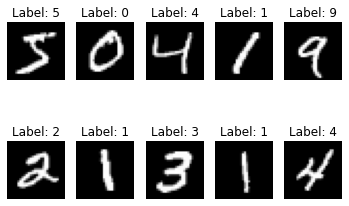

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Display the first 10 digits in the training set
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    index_of_one = np.argmax(y_train[i])
    plt.title(f"Label: {index_of_one}")
    plt.axis('off')
plt.show()

Now, let's create the sequental model of the keras for adding the layers of the CNN one by one.

The Sequential model should have the following architecture:
-> Input with shape  [128×128×1]
 
-> Conv2D (32 filters; kernel size is  [3×3]
 ; activation function is relu )


-> MaxPooling2D layer with pool size  [2×2]
 
-> Conv2D (64 filters; kernel size is  [3×3]
 ; activation function is relu )

-> MaxPooling2D layer with pool size  [2×2]
 
-> Flatten

-> Dropout layer with the 50% rate

-> Dense layer with the softmax activation function (you should also specify the number of output classes)

In [ ]:
# implement the CNN model with the given architecture above
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, losses

num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

### What is the "Flatten" layer?

- In a CNN, the convolutional layers perform feature extraction by applying filters to the input image. The output of these layers is a 3D tensor that contains the spatial information of the image, as well as the extracted features. However, in order to feed this output to a fully connected layer, we need to convert it into a 1D tensor, which can be achieved using the flatten layer.

- The flatten layer takes the 3D tensor output of the last convolutional layer and converts it into a 1D tensor by reshaping it. This process does not modify the data, but rather rearranges it into a linear sequence. This linear sequence can then be fed to the fully connected layers, which can then learn to classify the image.

Let's start the training process.  Before that, we should config the model with losses and metrics with model.compile().

In [ ]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



Epoch 1/5
422/422 [==============================] - 51s 118ms/step - loss: 0.3625 - accuracy: 0.8905 - val_loss: 0.0782 - val_accuracy: 0.9793
Epoch 2/5
422/422 [==============================] - 48s 113ms/step - loss: 0.1101 - accuracy: 0.9675 - val_loss: 0.0560 - val_accuracy: 0.9852
Epoch 3/5
422/422 [==============================] - 50s 119ms/step - loss: 0.0855 - accuracy: 0.9731 - val_loss: 0.0462 - val_accuracy: 0.9862
Epoch 4/5
422/422 [==============================] - 49s 116ms/step - loss: 0.0705 - accuracy: 0.9780 - val_loss: 0.0397 - val_accuracy: 0.9887
Epoch 5/5
422/422 [==============================] - 49s 116ms/step - loss: 0.0628 - accuracy: 0.9804 - val_loss: 0.0378 - val_accuracy: 0.9892


Let's plot the diagram which shows the progress in loss of the model during the train:

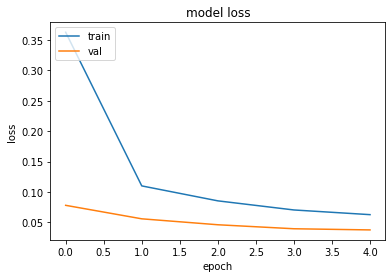

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

We can also plot the diagram which shows the progress of the model with regard to its accuracy.

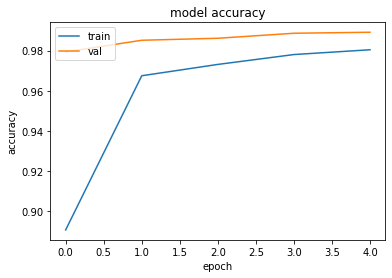

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Finally, let's evaluate our CNN on the test set

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03467285633087158
Test accuracy: 0.9882000088691711


## Challenge Activity

The CNN we built has a **Dropout** layer. 

1. Read the original dropout paper by Geoffrey Hinton et al., "Dropout: A Simple Way to Prevent Neural Networks from Overfitting" (2014), to understand the importance of DropOut. 

2. Finally, create a new CNN without Dropout layer, train and test it the same way as above to see  impact on performance.